In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

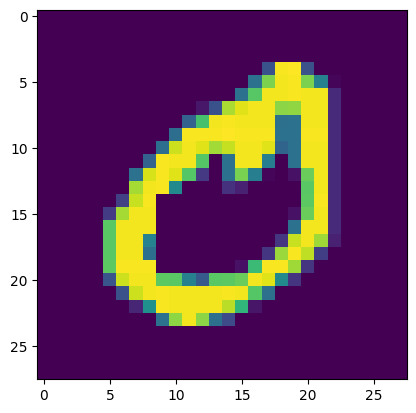

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[21])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))#this will convert 28*28 to 784*1 np array
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 14s 8ms/step - loss: 0.2833 - accuracy: 0.9182 - val_loss: 0.1546 - val_accuracy: 0.9534
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1213 - accuracy: 0.9629 - val_loss: 0.1211 - val_accuracy: 0.9652
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.9740 - val_loss: 0.1048 - val_accuracy: 0.9687
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0635 - accuracy: 0.9798 - val_loss: 0.0970 - val_accuracy: 0.9720
Epoch 5/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0489 - accuracy: 0.9842 - val_loss: 0.1094 - val_accuracy: 0.9678
Epoch 6/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 0.0976 - val_accuracy: 0.9728
Epoch 7/25
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0321 - accuracy: 0.9895 - val_loss: 0.1102 - val_accurac

In [14]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9779

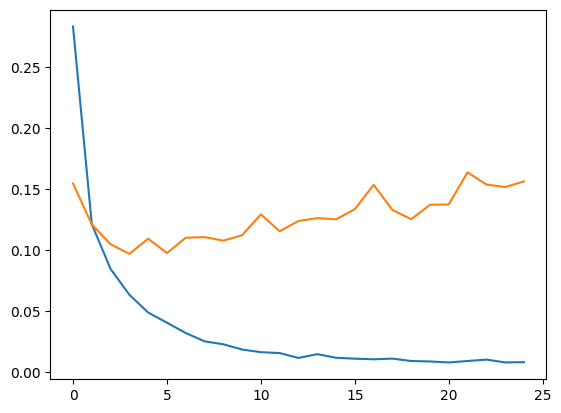

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

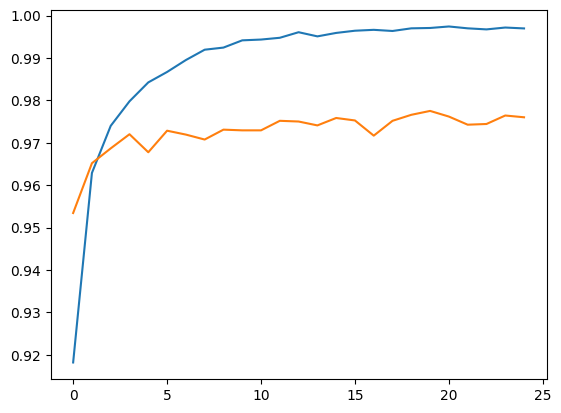

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

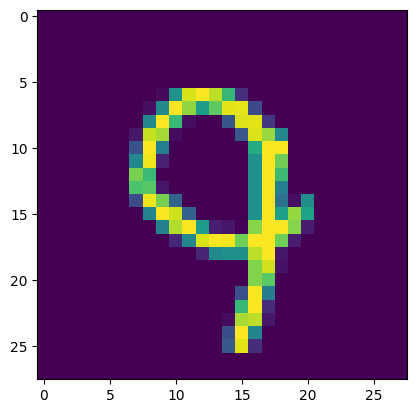

In [19]:
plt.imshow(X_test[999])

In [20]:
model.predict(X_test[999].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 20ms/step


array([9])